In [1]:
import numpy as np
import pandas as pd
import os
import glob

In [6]:
def process_data(filepath):
    # get all files matching extension from directory
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.json'))
        for f in files :
            all_files.append(os.path.abspath(f))

    # get total number of files found
    num_files = len(all_files)
    print('{} files found in {}'.format(num_files, filepath))
    file = all_files[0]
    df_new = pd.read_json(file,lines=True)
    columns=df_new.columns
    
    # iterate over files and process
    df = pd.DataFrame(columns=columns)
    for file in all_files:
        df_new = pd.read_json(file,lines=True)
        df = pd.concat([df,df_new],ignore_index=True)
    return df

In [7]:
df = process_data("data/log_data")

30 files found in data/log_data


In [8]:
df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Sydney Youngblood,Logged In,Jacob,M,53,Klein,238.07955,paid,"Tampa-St. Petersburg-Clearwater, FL",PUT,NextSong,1.540558e+12,954,Ain't No Sunshine,200,1543449657796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",73
1,Gang Starr,Logged In,Layla,F,88,Griffin,151.92771,paid,"Lake Havasu City-Kingman, AZ",PUT,NextSong,1.541057e+12,984,My Advice 2 You (Explicit),200,1543449690796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",24
2,3OH!3,Logged In,Layla,F,89,Griffin,192.52200,paid,"Lake Havasu City-Kingman, AZ",PUT,NextSong,1.541057e+12,984,My First Kiss (Feat. Ke$ha) [Album Version],200,1543449841796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",24
3,RÃÂ¶yksopp,Logged In,Jacob,M,54,Klein,369.81506,paid,"Tampa-St. Petersburg-Clearwater, FL",PUT,NextSong,1.540558e+12,954,The Girl and The Robot,200,1543449895796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",73
4,Kajagoogoo,Logged In,Layla,F,90,Griffin,223.55546,paid,"Lake Havasu City-Kingman, AZ",PUT,NextSong,1.541057e+12,984,Too Shy,200,1543450033796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",24


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

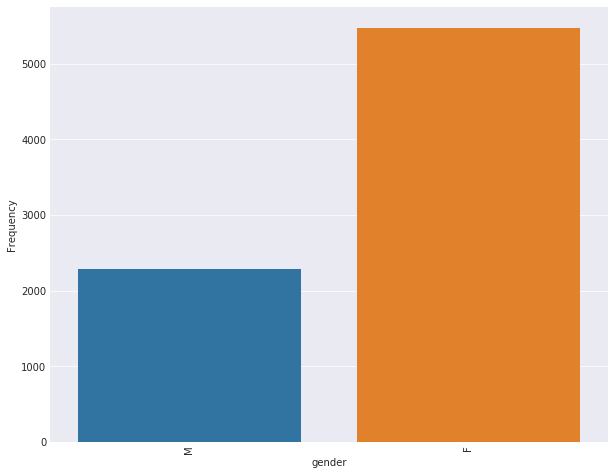

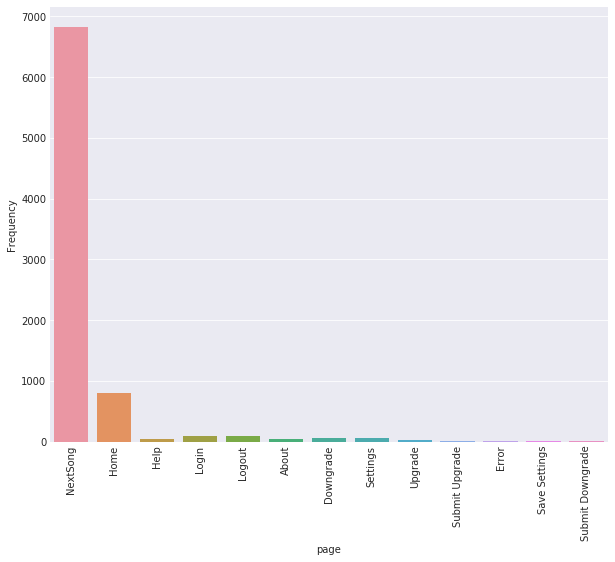

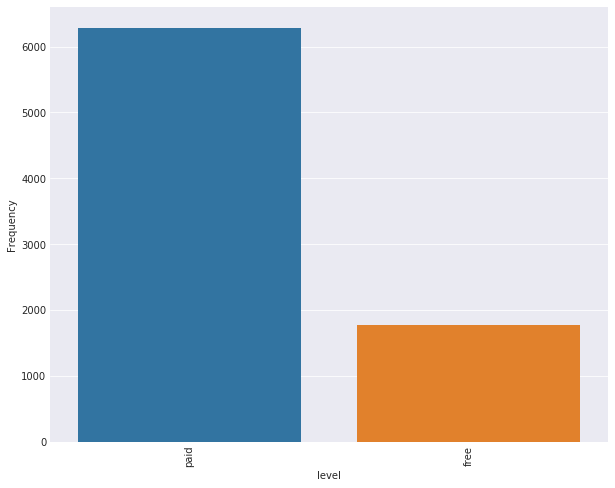

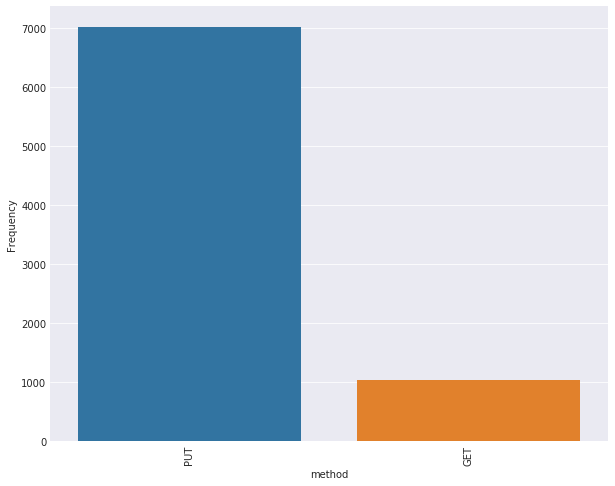

In [17]:
cat_to_plot = ["gender", "page", "level", "method"]

def plot(feat):
    plt.figure(figsize=(10,8))
    sns.countplot(df[feat])
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")

for col in cat_to_plot:
    plot(col)
    
    
    
# plt.figure(figsize=(10,8))
# sns.countplot(df['page'])
# plt.xticks(rotation=90)
# plt.xlabel("Pages")
# plt.ylabel("Frequency")

### Conclusion

From our plot on the log data,  we can see that

1. We have more female interactions
2. There are more paid plan user than free plan at a very large margin.
3. Nextsong DOmiated the Page feature.